In [42]:
from matplotlib import pyplot as plt
import pandas as pd
import os
import numpy as np
import datetime
from IPython.display import display, Markdown

data = pd.read_csv("./data/output.csv")

## Graphs

### Breakdown of the age of branches (including default) 

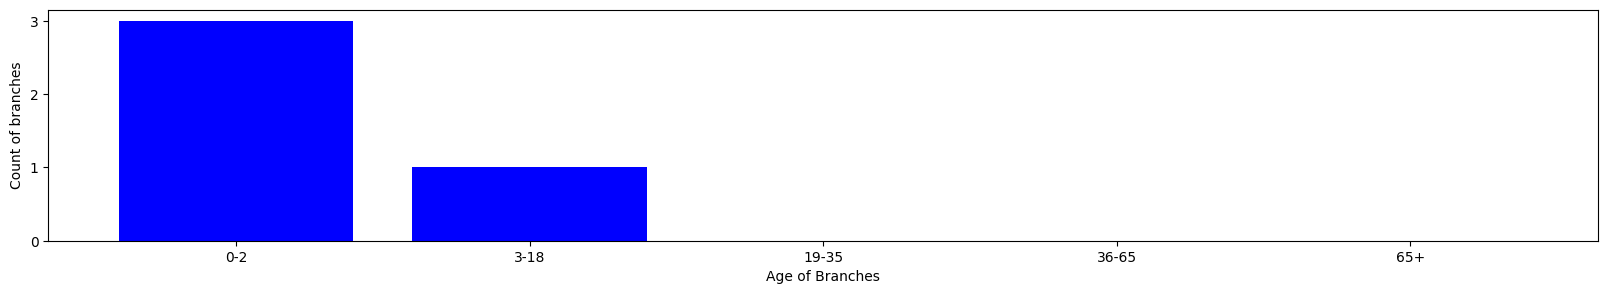

In [43]:
data["Last Commit Age"] = [(datetime.datetime.now() - datetime.datetime.strptime(data.at[row_index, "Last Commit Authored Date"], "%Y-%m-%dT%H:%M:%S+00:00")).days for row_index in range(len(data))]

bins = [-1, 2, 18, 35, 65, np.inf]
names = ['0-2', '3-18', '19-35', '36-65', '65+']
# right=True means the right of the two values is counted in the bin. For example the number 18 is in the 3-18 bin
data["Last Commit Age Bucket"] = pd.cut(data['Last Commit Age'], bins, right=True, labels=names)

new_data = pd.DataFrame({
    "Bucket": names,
    "Bucket Count": data["Last Commit Age Bucket"].value_counts(),
})

fig, ax = plt.subplots(1, 1, figsize=(20,3))

ax.bar(new_data["Bucket"],new_data["Bucket Count"], color='blue')

ax.set_xlabel("Age of Branches")
ax.set_xticks(new_data["Bucket"])

ax.set_ylabel("Count of branches")
max_count = new_data["Bucket Count"].max()
ax.set_yticks(np.arange(0, max_count + (max_count * .30)))

plt.show()


In [44]:
projects = data["Project Name"].unique()
number_of_branches = []
last_commit_authored_date = []
last_commit_author = []
last_commit_title = []
last_commit_branch = []

for project in projects:
    number_of_branches.append(data["Project Name"].value_counts()[project])

    commit_details = pd.DataFrame(data[data["Project Name"] == project]).sort_values(by="Last Commit Authored Date", ascending=False).iloc[0]

    last_commit_authored_date.append(commit_details["Last Commit Authored Date"])
    last_commit_author.append(commit_details["Last Commit Author"])
    last_commit_title.append(commit_details["Last Commit Title"])
    last_commit_branch.append(commit_details["Branch Name"])

branch_count_df = pd.DataFrame({
    "Project Name": projects,
    "Number of Branches": number_of_branches,
    "Last Commit Branch": last_commit_branch,
    "Last Commit Authored Date": last_commit_authored_date,
    "Last Commit Title": last_commit_title,
    "Last Commit Author": last_commit_author,
})

number_of_items_to_display = 10
display(Markdown(f"## Top {number_of_items_to_display} projects sorted by the number of open branches"))
display(branch_count_df.sort_values(by="Number of Branches", ascending=False).head(number_of_items_to_display).style.hide(axis="index"))

## Top 10 projects sorted by the number of open branches

Project Name,Number of Branches,Last Commit Branch,Last Commit Authored Date,Last Commit Title,Last Commit Author
test,2,new-branch-yea,2023-03-24T06:35:52+00:00,Update README.md,Administrator
A New Groups Project,1,main,2023-03-24T05:15:59+00:00,Initial commit,Administrator
Monitoring,1,main,2023-03-21T06:40:39+00:00,Update .gitlab-ci.yml file,Administrator
